In [144]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [145]:
numb_x_src_path = '../../Dataset/MixedDataSet.json'
y_src_path = '../../DataBook/Mixed_Data_Analyst.xlsx'

In [146]:
numb_data = pd.read_json(numb_x_src_path)
numb_data = numb_data.iloc[:, :-59022]

In [147]:
df_supervision = pd.read_excel(y_src_path)
plagiarised_array = df_supervision['Plagiarised'].astype(int).values

In [148]:
X_N = np.nan_to_num(numb_data.values, nan=0, copy=True).astype(int)
y = plagiarised_array

In [149]:
X_N_train, X_N_test, y_N_train, y_N_test = train_test_split(X_N, y, test_size=0.2, random_state=32)

In [150]:
# scaler = StandardScaler()
# X_N_train = scaler.fit_transform(X_N_train)
# X_N_test = scaler.fit_transform(X_N_test)

In [151]:
numbP = Perceptron()
numbP.fit(X_N_train,y_N_train)

percepPredict = numbP.predict(X_N_test)

print(f"Training data score: {numbP.score(X_N_train, y_N_train)}")
print(f"Test data score: {numbP.score(X_N_test, y_N_test)}")

Training data score: 0.9528301886792453
Test data score: 0.9259259259259259


In [190]:
NPH = 32
numb_model = keras.models.Sequential([
    keras.layers.Input(shape=(16689,)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


LOSS_FN = keras.losses.BinaryCrossentropy()

numb_model.compile(optimizer='adam', loss=LOSS_FN, metrics=['accuracy'])

history = numb_model.fit(X_N_train, y_N_train, epochs=300, validation_data=(X_N_test, y_N_test))

y_pred_numb_binary_flat = (numb_model.predict(X_N_test).flatten() > 0.5).astype(int)

Epoch 1/300
4/4 [==============================] - 1s 74ms/step - loss: 60.4560 - accuracy: 0.3208 - val_loss: 0.6404 - val_accuracy: 0.9259
Epoch 2/300
4/4 [==============================] - 0s 33ms/step - loss: 0.7654 - accuracy: 0.8491 - val_loss: 0.6908 - val_accuracy: 0.8148
Epoch 3/300
4/4 [==============================] - 0s 31ms/step - loss: 0.7446 - accuracy: 0.8208 - val_loss: 0.6898 - val_accuracy: 0.8148
Epoch 4/300
4/4 [==============================] - 0s 34ms/step - loss: 0.6825 - accuracy: 0.8585 - val_loss: 0.6887 - val_accuracy: 0.8148
Epoch 5/300
4/4 [==============================] - 0s 35ms/step - loss: 0.6778 - accuracy: 0.8585 - val_loss: 0.6877 - val_accuracy: 0.8148
Epoch 6/300
4/4 [==============================] - 0s 41ms/step - loss: 0.6739 - accuracy: 0.8585 - val_loss: 0.6866 - val_accuracy: 0.8148
Epoch 7/300
4/4 [==============================] - 0s 37ms/step - loss: 0.6725 - accuracy: 0.8585 - val_loss: 0.6856 - val_accuracy: 0.8148
Epoch 8/300
4/4 [==

In [153]:
# numb_model.summary()
# numb_model.save("scaled_model.h5")

In [154]:
for numb, percep, actual in zip(y_pred_numb_binary_flat, percepPredict, y_N_test):
    print(f"Number: {numb}, Perceptron: {percep} Actual: {actual}")

Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 1 Actual: 1
Number: 0, Perceptron: 1 Actual: 1
Number: 0, Perceptron: 0 Actual: 1
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 1 Actual: 1
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 1 Actual: 1
Number: 0, Perceptron: 1 Actual: 0
Number: 0, Perceptron: 0 Actual: 0


In [155]:
print(numb_model.evaluate(X_N_test,y_N_test)[1])
#numb_model.save("haldmodel.h5")

1/1 [==============================] - 0s 26ms/step - loss: 0.6901 - accuracy: 0.8148
0.8148148059844971


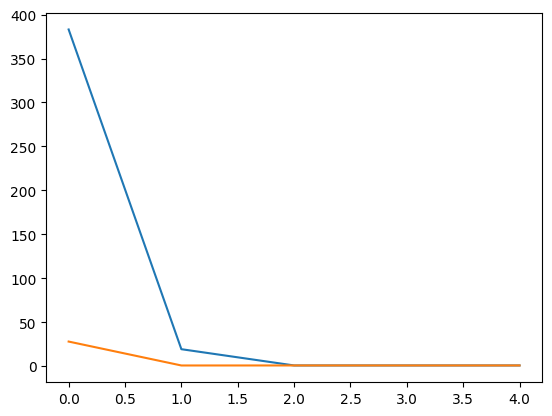

In [156]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

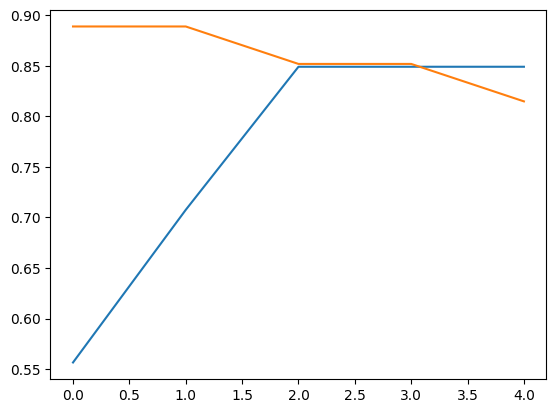

In [157]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])